In [4]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [5]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [6]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [7]:
content_image = load_image('village.jpg')
style_image = load_image('the-persistence-of-memory-1931.jpg')

In [9]:
content_image.shape

TensorShape([1, 427, 640, 3])

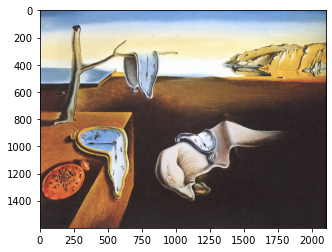

In [10]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [11]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

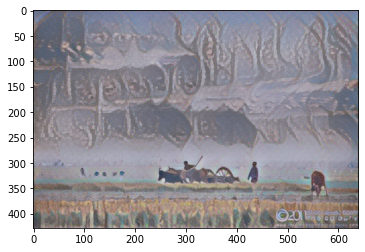

In [12]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [13]:

cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True

References:
[1]. https://github.com/nicknochnack/Python-Neural-Style-Transfer/blob/main/Neural%20Style%20Transfer-Template.ipynb